In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin

In [2]:
df = pd.read_csv(r"ola_driver_scaler.csv",delimiter=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [4]:
df.shape

(19104, 14)

In [5]:
from sklearn.model_selection import train_test_split

# Step 1: Get unique driver IDs
unique_driver_ids = df['Driver_ID'].unique()

# Step 2: Split driver IDs into train and test sets
train_driver_ids, test_driver_ids = train_test_split(
    unique_driver_ids, test_size=0.2, random_state=42
)

# Step 3: Filter the main DataFrame using these IDs
training_data = df[df['Driver_ID'].isin(train_driver_ids)].reset_index(drop=True)
testing_data = df[df['Driver_ID'].isin(test_driver_ids)].reset_index(drop=True)

In [6]:
training_data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            15372 non-null  int64  
 1   MMM-YY                15372 non-null  object 
 2   Driver_ID             15372 non-null  int64  
 3   Age                   15323 non-null  float64
 4   Gender                15331 non-null  float64
 5   City                  15372 non-null  object 
 6   Education_Level       15372 non-null  int64  
 7   Income                15372 non-null  int64  
 8   Dateofjoining         15372 non-null  object 
 9   LastWorkingDate       1289 non-null   object 
 10  Joining Designation   15372 non-null  int64  
 11  Grade                 15372 non-null  int64  
 12  Total Business Value  15372 non-null  int64  
 13  Quarterly Rating      15372 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.6+ MB


In [8]:
testing_data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,138,01/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,243110,4
1,139,02/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,646330,4
2,140,03/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,17651940,4
3,141,04/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,242510,4
4,142,05/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,1098080,4


In [9]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3732 non-null   int64  
 1   MMM-YY                3732 non-null   object 
 2   Driver_ID             3732 non-null   int64  
 3   Age                   3720 non-null   float64
 4   Gender                3721 non-null   float64
 5   City                  3732 non-null   object 
 6   Education_Level       3732 non-null   int64  
 7   Income                3732 non-null   int64  
 8   Dateofjoining         3732 non-null   object 
 9   LastWorkingDate       327 non-null    object 
 10  Joining Designation   3732 non-null   int64  
 11  Grade                 3732 non-null   int64  
 12  Total Business Value  3732 non-null   int64  
 13  Quarterly Rating      3732 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 408.3+ KB


In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            15372 non-null  int64  
 1   MMM-YY                15372 non-null  object 
 2   Driver_ID             15372 non-null  int64  
 3   Age                   15323 non-null  float64
 4   Gender                15331 non-null  float64
 5   City                  15372 non-null  object 
 6   Education_Level       15372 non-null  int64  
 7   Income                15372 non-null  int64  
 8   Dateofjoining         15372 non-null  object 
 9   LastWorkingDate       1289 non-null   object 
 10  Joining Designation   15372 non-null  int64  
 11  Grade                 15372 non-null  int64  
 12  Total Business Value  15372 non-null  int64  
 13  Quarterly Rating      15372 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.6+ MB


In [11]:
training_data['Driver_ID'].nunique()

1904

In [12]:
testing_data.shape

(3732, 14)

In [13]:
training_data.shape

(15372, 14)

In [14]:
testing_data['Driver_ID'].nunique()

477

In [15]:
the_variable = 'City'

#Below is used to check if that variable has any NAs
#But considering the above column being 0 for the full data, there is no column that has NA here.
print(training_data[the_variable].nunique(dropna=True))
print(training_data[the_variable].nunique(dropna=False))
print(training_data[the_variable].nunique(dropna=True) == training_data[the_variable].nunique(dropna=False))
#Another way to confirm
print(training_data[the_variable].isnull().sum())

#Below is to get the value counts
training_data[the_variable].value_counts(dropna=False)

29
29
True
0


,count
City,
C20,833
C26,748
C29,747
C22,700
C16,633
C27,619
C5,566
C15,557
C12,556


In [16]:
from mypipes import *

In [17]:
p1 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID','MMM-YY'])),
    ('data_imputer', ModeDataFrameImputer()),
    ('get_date_count', GetDriverYearCounts())
])


p2 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID','Gender','Joining Designation','Grade'])),
    ('data_imputer', ModeDataFrameImputer()),
    ('get_value', DriverModeAggregator())
])


p3 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID','City'])),
    ('data_imputer', ModeDataFrameImputer()),
    ('get_value', DriverModeAggregator()),
    ('create_dummies', get_dummies_Pipe())
])


p4 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID','Education_Level','Quarterly Rating','Age'])),
    ('data_imputer', MaxDataFrameImputer()),
    ('get_value', DriverMaxAggregator())
])


p5 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID','Income'])),
    ('data_imputer', MeanDataFrameImputer()),
    ('get_value', DriverMeanAggregator())
])


p6 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID','Total Business Value'])),
    ('data_imputer', MeanDataFrameImputer()),
    ('get_value', DriverSumAggregator())
])


p7 = pdPipeline([
    ('var_select', VarSelector(['Driver_ID', 'Dateofjoining', 'LastWorkingDate'])),
    ('date_features', DriverDateProcessor())
])

In [18]:
data_pipe = FeatureUnion([
    ('first_pipe', p1),
    ('second_pipe', p2),
    ('third_pipe', p3),
    ('fourth_pipe', p4),
    ('fifth_pipe', p5),
    ('sixth_pipe', p6),
    ('seventh_pipe', p7)
])

In [19]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(training_data),
                     columns=data_pipe.get_feature_names_out())

In [20]:
x_train

,first_pipe__Driver_ID_count_2019,first_pipe__Driver_ID_count_2020,second_pipe__Gender_mode,second_pipe__Joining Designation_mode,second_pipe__Grade_mode,third_pipe__City_mode_C20,third_pipe__City_mode_C29,third_pipe__City_mode_C26,third_pipe__City_mode_C15,third_pipe__City_mode_C8,...,third_pipe__City_mode_C23,third_pipe__City_mode_C17,third_pipe__City_mode_C13,fourth_pipe__Education_Level_max,fourth_pipe__Quarterly Rating_max,fourth_pipe__Age_max,fifth_pipe__Income_mean,sixth_pipe__Total Business Value_sum,seventh_pipe__tenure_days,seventh_pipe__didDriverQuit
0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,28.0,57387.0,1715580.0,314.0,1.0
1,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,31.0,67016.0,0.0,203.0,0.0
2,1.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,43.0,65603.0,350000.0,290.0,1.0
3,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,29.0,46368.0,120360.0,-60.0,1.0
4,0.0,5.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,31.0,78728.0,1265000.0,153.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.0,11.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,4.0,25.0,46952.0,8633370.0,318.0,0.0
1900,12.0,12.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,34.0,82815.0,21748820.0,1904.0,0.0
1901,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,34.0,12105.0,0.0,61.0,1.0
1902,6.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,28.0,69498.0,977830.0,334.0,1.0


In [62]:
driver_ids = training_data[['Driver_ID']].drop_duplicates().reset_index(drop=True)

In [63]:
driver_ids

,Driver_ID
0,1
1,2
2,4
3,5
4,6
...,...
1899,2781
1900,2784
1901,2785
1902,2787


In [23]:
y_train=x_train['seventh_pipe__didDriverQuit']

In [24]:
y_train

,seventh_pipe__didDriverQuit
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
1899,0.0
1900,0.0
1901,1.0
1902,1.0


In [25]:
x_train = x_train.drop(columns=['seventh_pipe__didDriverQuit'])

In [26]:
x_train

,first_pipe__Driver_ID_count_2019,first_pipe__Driver_ID_count_2020,second_pipe__Gender_mode,second_pipe__Joining Designation_mode,second_pipe__Grade_mode,third_pipe__City_mode_C20,third_pipe__City_mode_C29,third_pipe__City_mode_C26,third_pipe__City_mode_C15,third_pipe__City_mode_C8,...,third_pipe__City_mode_C24,third_pipe__City_mode_C23,third_pipe__City_mode_C17,third_pipe__City_mode_C13,fourth_pipe__Education_Level_max,fourth_pipe__Quarterly Rating_max,fourth_pipe__Age_max,fifth_pipe__Income_mean,sixth_pipe__Total Business Value_sum,seventh_pipe__tenure_days
0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,2.0,28.0,57387.0,1715580.0,314.0
1,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,31.0,67016.0,0.0,203.0
2,1.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,43.0,65603.0,350000.0,290.0
3,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,29.0,46368.0,120360.0,-60.0
4,0.0,5.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,31.0,78728.0,1265000.0,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.0,11.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,4.0,25.0,46952.0,8633370.0,318.0
1900,12.0,12.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,34.0,82815.0,21748820.0,1904.0
1901,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,34.0,12105.0,0.0,61.0
1902,6.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,28.0,69498.0,977830.0,334.0


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   first_pipe__Driver_ID_count_2019       1904 non-null   float64
 1   first_pipe__Driver_ID_count_2020       1904 non-null   float64
 2   second_pipe__Gender_mode               1904 non-null   float64
 3   second_pipe__Joining Designation_mode  1904 non-null   float64
 4   second_pipe__Grade_mode                1904 non-null   float64
 5   third_pipe__City_mode_C20              1904 non-null   float64
 6   third_pipe__City_mode_C29              1904 non-null   float64
 7   third_pipe__City_mode_C26              1904 non-null   float64
 8   third_pipe__City_mode_C15              1904 non-null   float64
 9   third_pipe__City_mode_C8               1904 non-null   float64
 10  third_pipe__City_mode_C22              1904 non-null   float64
 11  thir

In [28]:
x_train.isnull().sum()

,0
first_pipe__Driver_ID_count_2019,0
first_pipe__Driver_ID_count_2020,0
second_pipe__Gender_mode,0
second_pipe__Joining Designation_mode,0
second_pipe__Grade_mode,0
third_pipe__City_mode_C20,0
third_pipe__City_mode_C29,0
third_pipe__City_mode_C26,0
third_pipe__City_mode_C15,0
third_pipe__City_mode_C8,0


In [29]:
x_test=pd.DataFrame(data=data_pipe.transform(testing_data),
                     columns=data_pipe.get_feature_names_out())

In [30]:
x_test

,first_pipe__Driver_ID_count_2019,first_pipe__Driver_ID_count_2020,second_pipe__Gender_mode,second_pipe__Joining Designation_mode,second_pipe__Grade_mode,third_pipe__City_mode_C20,third_pipe__City_mode_C29,third_pipe__City_mode_C26,third_pipe__City_mode_C15,third_pipe__City_mode_C8,...,third_pipe__City_mode_C23,third_pipe__City_mode_C17,third_pipe__City_mode_C13,fourth_pipe__Education_Level_max,fourth_pipe__Quarterly Rating_max,fourth_pipe__Age_max,fifth_pipe__Income_mean,sixth_pipe__Total Business Value_sum,seventh_pipe__tenure_days,seventh_pipe__didDriverQuit
0,12.0,12.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,43.0,126132.333333,69867900.0,910.0,0.0
1,0.0,6.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,33.0,57375.000000,650020.0,153.0,1.0
2,6.0,12.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.0,35.0,92372.000000,21755910.0,634.0,0.0
3,12.0,7.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,38.0,84318.000000,22791310.0,1091.0,1.0
4,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,41.0,57987.000000,0.0,102.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,36.0,35607.000000,563400.0,285.0,1.0
473,4.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,27.0,54397.000000,0.0,3.0,1.0
474,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,35.0,50180.000000,0.0,32.0,0.0
475,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,26.0,29582.000000,0.0,92.0,1.0


In [31]:
x_test.isnull().sum()

,0
first_pipe__Driver_ID_count_2019,0
first_pipe__Driver_ID_count_2020,0
second_pipe__Gender_mode,0
second_pipe__Joining Designation_mode,0
second_pipe__Grade_mode,0
third_pipe__City_mode_C20,0
third_pipe__City_mode_C29,0
third_pipe__City_mode_C26,0
third_pipe__City_mode_C15,0
third_pipe__City_mode_C8,0


In [32]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   first_pipe__Driver_ID_count_2019       477 non-null    float64
 1   first_pipe__Driver_ID_count_2020       477 non-null    float64
 2   second_pipe__Gender_mode               477 non-null    float64
 3   second_pipe__Joining Designation_mode  477 non-null    float64
 4   second_pipe__Grade_mode                477 non-null    float64
 5   third_pipe__City_mode_C20              477 non-null    float64
 6   third_pipe__City_mode_C29              477 non-null    float64
 7   third_pipe__City_mode_C26              477 non-null    float64
 8   third_pipe__City_mode_C15              477 non-null    float64
 9   third_pipe__City_mode_C8               477 non-null    float64
 10  third_pipe__City_mode_C22              477 non-null    float64
 11  third_

In [33]:
driver_ids = testing_data[['Driver_ID']].drop_duplicates().reset_index(drop=True)

In [34]:
driver_ids

,Driver_ID
0,26
1,37
2,41
3,57
4,58
...,...
472,2773
473,2776
474,2778
475,2782


In [35]:
y_test=x_test['seventh_pipe__didDriverQuit']

In [36]:
y_test

,seventh_pipe__didDriverQuit
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
472,1.0
473,1.0
474,0.0
475,1.0


In [37]:
x_test = x_test.drop(columns=['seventh_pipe__didDriverQuit'])

In [38]:
x_test

,first_pipe__Driver_ID_count_2019,first_pipe__Driver_ID_count_2020,second_pipe__Gender_mode,second_pipe__Joining Designation_mode,second_pipe__Grade_mode,third_pipe__City_mode_C20,third_pipe__City_mode_C29,third_pipe__City_mode_C26,third_pipe__City_mode_C15,third_pipe__City_mode_C8,...,third_pipe__City_mode_C24,third_pipe__City_mode_C23,third_pipe__City_mode_C17,third_pipe__City_mode_C13,fourth_pipe__Education_Level_max,fourth_pipe__Quarterly Rating_max,fourth_pipe__Age_max,fifth_pipe__Income_mean,sixth_pipe__Total Business Value_sum,seventh_pipe__tenure_days
0,12.0,12.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,43.0,126132.333333,69867900.0,910.0
1,0.0,6.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,33.0,57375.000000,650020.0,153.0
2,6.0,12.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,3.0,35.0,92372.000000,21755910.0,634.0
3,12.0,7.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,38.0,84318.000000,22791310.0,1091.0
4,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,41.0,57987.000000,0.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,36.0,35607.000000,563400.0,285.0
473,4.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,27.0,54397.000000,0.0,3.0
474,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,35.0,50180.000000,0.0,32.0
475,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,26.0,29582.000000,0.0,92.0


In [39]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   first_pipe__Driver_ID_count_2019       477 non-null    float64
 1   first_pipe__Driver_ID_count_2020       477 non-null    float64
 2   second_pipe__Gender_mode               477 non-null    float64
 3   second_pipe__Joining Designation_mode  477 non-null    float64
 4   second_pipe__Grade_mode                477 non-null    float64
 5   third_pipe__City_mode_C20              477 non-null    float64
 6   third_pipe__City_mode_C29              477 non-null    float64
 7   third_pipe__City_mode_C26              477 non-null    float64
 8   third_pipe__City_mode_C15              477 non-null    float64
 9   third_pipe__City_mode_C8               477 non-null    float64
 10  third_pipe__City_mode_C22              477 non-null    float64
 11  third_

In [40]:
x_test.isnull().sum()

,0
first_pipe__Driver_ID_count_2019,0
first_pipe__Driver_ID_count_2020,0
second_pipe__Gender_mode,0
second_pipe__Joining Designation_mode,0
second_pipe__Grade_mode,0
third_pipe__City_mode_C20,0
third_pipe__City_mode_C29,0
third_pipe__City_mode_C26,0
third_pipe__City_mode_C15,0
third_pipe__City_mode_C8,0


In [41]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1904, 39), (1904,), (477, 39), (477,))

In [42]:
#This is to separate out some data in the beginning, so as to check with our data later

from sklearn.model_selection import train_test_split

x_initial_1_percent, x_99_percent, y_initial_1_percent, y_99_percent = train_test_split(
    x_train, y_train,
    test_size=0.99,
    stratify=y_train
)

In [43]:
#Below is to extract a sample data from the dataset

# from sklearn.model_selection import train_test_split


# x_train_sample, _, y_train_sample, _ = train_test_split(
#     x_99_percent, y_99_percent,
#     test_size=0.7,
#     stratify=y_99_percent
# )

#This is not needed here as the data-set is comparatively smaller

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf = RandomForestClassifier()

In [46]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
# param_dist = {"n_estimators":[100,200,300,500,700,1000],
#               "max_features": [5,10,20,25,30,35],
#               "bootstrap": [True, False],
#               'class_weight':[None,'balanced'],
#                 'criterion':['entropy','gini'],
#                 'max_depth':[None,5,10,15,20,30,50,70],
#                 'min_samples_leaf':[1,2,5,10,15,20],
#                 'min_samples_split':[2,5,10,15,20]
#                   }


param_dist = {"n_estimators":[175,180,185,195,200,205],
              "max_features": [17,18,19,27,28,29],
              "bootstrap": [True],
              'class_weight':[None,'balanced'],
                'criterion':['entropy'],
                'max_depth':[None,1,17,18,19,20,21],
                'min_samples_leaf':[1,2,3,4],
                'min_samples_split':[4,5,6,13,14,15,16]
                  }

In [ ]:
#Below is an attempt to make sure once a combination is picked, it is not repeated again. This is achieved by storing the combinations analyzed in a json file.
#Changed it to a pickle file instead of a json file to make the compute faster.

import random
import pickle
import os

# File to store picked combinations
PICKLE_FILE = "picked_combinations.pkl"

# Load previously picked combinations
def load_previous_combinations():
    if os.path.exists(PICKLE_FILE):
        with open(PICKLE_FILE, "rb") as file:
            return set(pickle.load(file))
    return set()

# Save newly picked combinations
def save_combinations(combinations):
    with open(PICKLE_FILE, "wb") as file:
        pickle.dump(combinations, file)

# Function to generate unique combinations on-the-fly
def pick_unique_combinations(params, num_combinations=10, max_attempts=1000):
    previous_combinations = load_previous_combinations()
    unique_combinations = set()
    new_combinations = []

    attempts = 0

    # Keep generating until you get the required number of unique combinations
    while len(new_combinations) < num_combinations:
        if attempts >= max_attempts:
            print("\n🚫 No more unique combinations available or limit reached.\n")
            break

        # Generate a random combination
        combination = {key: random.choice(values) for key, values in params.items()}
        combination_tuple = tuple(sorted(combination.items()))

        if combination_tuple not in previous_combinations and combination_tuple not in unique_combinations:
            unique_combinations.add(combination_tuple)
            new_combinations.append(combination)

        attempts += 1

    # Save the new combinations
    all_picked = previous_combinations.union(unique_combinations)
    save_combinations(all_picked)

    return new_combinations

# Example usage
combinations_to_run = pick_unique_combinations(param_dist, num_combinations=20, max_attempts=1000) #max_attempts=1000, This can be changed to check for more possibilities if most of the
#unique combinations are exhausted.

In [ ]:
#To convert the list of dictionaries to the format desired by gridSearch
#i.e. [{'n_estimators': 200,..... to [{'n_estimators': [200],.........
combinations_to_run = [{key: [value] for key, value in dictionary.items()} for dictionary in combinations_to_run]

In [ ]:
combinations_to_run

[{'n_estimators': [195],
  'max_features': [29],
  'bootstrap': [True],
  'class_weight': ['balanced'],
  'criterion': ['entropy'],
  'max_depth': [17],
  'min_samples_leaf': [4],
  'min_samples_split': [13]},
 {'n_estimators': [200],
  'max_features': [18],
  'bootstrap': [True],
  'class_weight': [None],
  'criterion': ['entropy'],
  'max_depth': [17],
  'min_samples_leaf': [4],
  'min_samples_split': [13]},
 {'n_estimators': [175],
  'max_features': [27],
  'bootstrap': [True],
  'class_weight': ['balanced'],
  'criterion': ['entropy'],
  'max_depth': [20],
  'min_samples_leaf': [4],
  'min_samples_split': [13]},
 {'n_estimators': [175],
  'max_features': [19],
  'bootstrap': [True],
  'class_weight': [None],
  'criterion': ['entropy'],
  'max_depth': [1],
  'min_samples_leaf': [4],
  'min_samples_split': [13]},
 {'n_estimators': [185],
  'max_features': [28],
  'bootstrap': [True],
  'class_weight': [None],
  'criterion': ['entropy'],
  'max_depth': [20],
  'min_samples_leaf': [4],

In [ ]:
#This is the function which runs a gridsearch for the given combination and prints the score with std_dev.

# Reset random state each time
np.random.seed(None)  # Reset the random state
# Randomize number of splits between 8 and 12
n_splits = np.random.choice([8, 9, 10, 11, 12])

from sklearn.model_selection import KFold
def my_function(arg):
    print(f"Combination: {arg} is in progress")
    # Randomized KFold strategy
    cv_strategy = KFold(n_splits=n_splits, shuffle=True)

    # GridSearchCV with your regressor and CV strategy
    random_search = GridSearchCV(clf, param_grid=arg,
                                 scoring='roc_auc',
                                 cv=cv_strategy,
                                 n_jobs=1,  # Run serially
                                 verbose=20)

    random_search.fit(x_99_percent, y_99_percent)
    print()
    report(random_search.cv_results_, 1)
    print("\n")

In [ ]:

#Below is the logic/method to run the for loop with time constraint. If time exceeds the limit, it skips and moves to the next iteration.
import multiprocessing
import time


def run_with_timeout(arguments, timeout=2):
    for arg in arguments:
        process = multiprocessing.Process(target=my_function, args=(arg,))
        process.start()

        # Wait for the process or timeout
        process.join(timeout)

        if process.is_alive():
            print(f"Function with argument {arg} was forcefully stopped due to time constraint")
            print()
            process.terminate()
            process.join()

In [ ]:
#Executing the above logic/method
run_with_timeout(combinations_to_run, timeout=600)

Combination: {'n_estimators': [195], 'max_features': [29], 'bootstrap': [True], 'class_weight': ['balanced'], 'criterion': ['entropy'], 'max_depth': [17], 'min_samples_leaf': [4], 'min_samples_split': [13]} is in progress
Fitting 9 folds for each of 1 candidates, totalling 9 fits
[CV 1/9; 1/1] START bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=17, max_features=29, min_samples_leaf=4, min_samples_split=13, n_estimators=195
[CV 1/9; 1/1] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=17, max_features=29, min_samples_leaf=4, min_samples_split=13, n_estimators=195;, score=0.968 total time=   2.3s
[CV 2/9; 1/1] START bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=17, max_features=29, min_samples_leaf=4, min_samples_split=13, n_estimators=195
[CV 2/9; 1/1] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=17, max_features=29, min_samples_leaf=4, min_samples_split=13, n_estimators=195;, score=0.974 tota

In [ ]:
#Creating an empty text file and pasting the above output in it
!touch output.txt

In [ ]:
#Now getting the top score by running the below code.
import re

# Read the output from a text file
file_path = "output.txt"  # Replace with the path to your file
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

results = []
i = 0

# Loop through the lines and group the relevant blocks
while i < len(lines):
    line = lines[i].strip()
    if line.startswith("Model with rank:"):
        model_line = line
        # Check for "Mean validation score" and "Parameters" lines
        if i + 1 < len(lines) and lines[i + 1].strip().startswith("Mean validation score:"):
            score_line = lines[i + 1].strip()
            if i + 2 < len(lines) and lines[i + 2].strip().startswith("Parameters:"):
                params_line = lines[i + 2].strip()
                block = f"{model_line}\n{score_line}\n{params_line}"
                # Updated regex: now captures an optional negative sign
                m = re.search(r"Mean validation score:\s*(-?[\d\.]+)", score_line)
                if m:
                    score = float(m.group(1))
                    results.append((score, block))
                i += 3
            else:
                block = f"{model_line}\n{score_line}"
                m = re.search(r"Mean validation score:\s*(-?[\d\.]+)", score_line)
                if m:
                    score = float(m.group(1))
                    results.append((score, block))
                i += 2
        else:
            i += 1
    else:
        i += 1

# Sort results by score in descending order.
# For negative values, this means the score closest to zero will be at the top.
results.sort(key=lambda x: x[0], reverse=True)

# Display the top 5 results (or fewer if there aren't 5)
print("Top 5 Model, Score, and Parameters outputs:\n")
top_five = results[:5]
for score, block in reversed(top_five):
    print(block)
    print()

Top 5 Model, Score, and Parameters outputs:

Model with rank: 1
Mean validation score: 0.96658 (std: 0.00850)
Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 19, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 185}

Model with rank: 1
Mean validation score: 0.96661 (std: 0.00754)
Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 29, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 180}

Model with rank: 1
Mean validation score: 0.96667 (std: 0.00769)
Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 28, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 185}

Model with rank: 1
Mean validation score: 0.96678 (std: 0.00792)
Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 17, 'max_features': 29, 'min_samples_leaf': 4

In [ ]:
#After multiple trials, I am selecting the below

# Model with rank: 1
# Mean validation score: 0.96774 (std: 0.00793)
# Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 28, 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 180}

In [47]:
rf=RandomForestClassifier(**{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 28, 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 180})

In [ ]:
#Below is to save the trained model as a pickle file so that we need not train again. Make sure to download/save the grid_search.pkl file to re-use it.

#Ideally, run the below full block to make sure the model is converted to a file and downloaded as well.

rf.fit(x_99_percent,y_99_percent)

import pickle

# Save the trained model as a pickle file
with open("trained_model.pkl", "wb") as file:  # Use .pkl extension for the file
    pickle.dump(rf, file)


from google.colab import files
files.download('trained_model.pkl')
print("Trained model downloaded as a pickle file.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Trained model downloaded as a pickle file.


In [47]:
#Below is to load a trained model, so that can be used
import pickle

# Open the pickled file in read binary mode
with open("trained_model.pkl", "rb") as f:
    # Load the grid search object
    rf = pickle.load(f)

# Use the loaded grid_search for predictions, accessing best parameters, etc.

In [48]:
#Feature importance
feat_imp_df=pd.DataFrame({'features':x_train.columns,
                          'importance':rf.feature_importances_})

feat_imp_df=feat_imp_df.sort_values('importance',ascending=False)
feat_imp_df['normalised_imp']=feat_imp_df['importance']/np.sum(feat_imp_df['importance'])
feat_imp_df['cum_imp']=np.cumsum(feat_imp_df['normalised_imp'])

In [49]:
feat_imp_df

,features,importance,normalised_imp,cum_imp
1,first_pipe__Driver_ID_count_2020,0.471579,0.471579,0.471579
0,first_pipe__Driver_ID_count_2019,0.143387,0.143387,0.614966
38,seventh_pipe__tenure_days,0.137414,0.137414,0.752381
37,sixth_pipe__Total Business Value_sum,0.111764,0.111764,0.864145
36,fifth_pipe__Income_mean,0.037835,0.037835,0.901980
35,fourth_pipe__Age_max,0.026348,0.026348,0.928328
34,fourth_pipe__Quarterly Rating_max,0.014800,0.014800,0.943128
3,second_pipe__Joining Designation_mode,0.008056,0.008056,0.951184
33,fourth_pipe__Education_Level_max,0.006067,0.006067,0.957251
2,second_pipe__Gender_mode,0.004272,0.004272,0.961523


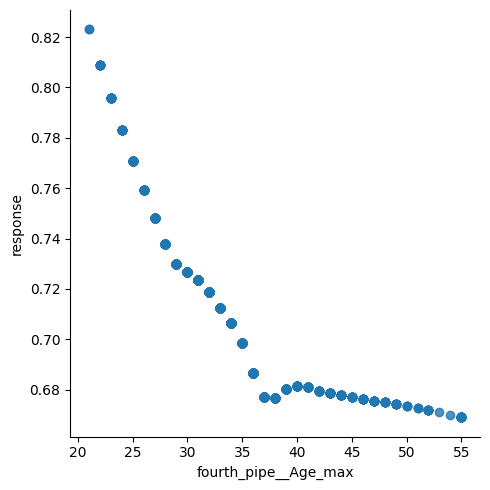

In [67]:
#Below plots to find if increase in feature will lead to 0 or 1 in the output.
var_name='fourth_pipe__Age_max'

preds=rf.predict_proba(x_train)[:,1]

var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

%matplotlib inline

import seaborn as sns

#sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

In [ ]:
#Trying f-beta score

In [49]:
from sklearn.metrics import fbeta_score

train_score=rf.predict_proba(x_99_percent)[:,1]
real=y_99_percent



fbeta_all=[]
cutoffs=np.linspace(0.01,0.99,99)
for cutoff in cutoffs:
    predicted=(train_score>cutoff).astype(int)
    fbeta_all.append(fbeta_score(real,predicted,beta=2))


mycutoff=cutoffs[fbeta_all==max(fbeta_all)]
mycutoff

array([], shape=(0, 99), dtype=float64)

In [ ]:
#This is not giving me a cut-off, so, trying with KS method.

In [50]:
#Below steps to get the cut-off with K-S method
cutoffs=np.linspace(0.01,0.99,99)

train_score=rf.predict_proba(x_99_percent)[:,1]
real=y_99_percent

In [51]:
KS_all=[]

for cutoff in cutoffs:

    predicted=(train_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()

    P=TP+FN
    N=TN+FP


    KS=(TP/P)-(FP/N)

    KS_all.append(KS)

In [52]:
mycutoff=cutoffs[KS_all==max(KS_all)]
mycutoff

array([0.52])

In [ ]:
#Now using the model with the cutoff to predict on the initially separted 1% data

In [53]:
test_score=rf.predict_proba(x_initial_1_percent)[:,1]
test_classes=(test_score>mycutoff).astype(int)

In [54]:
y_initial_1_percent.shape

(19,)

In [55]:
test_classes.shape

(19,)

In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_initial_1_percent, test_classes)
print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 1.0000


In [57]:
#Checking f_beta score

from sklearn.metrics import fbeta_score

# If your model outputs probabilities:
y_pred_prob = rf.predict_proba(x_initial_1_percent)[:, 1]
threshold = mycutoff  # You can adjust this threshold as needed
y_pred = (y_pred_prob >= threshold).astype(int)

# Calculate the F-beta score with beta=2
fbeta = fbeta_score(y_initial_1_percent, y_pred, beta=2)
print("F-beta score (beta=2):", fbeta)

# Check if it meets the requirement
if fbeta > 0.26:
    print("Passing grade achieved!")
else:
    print("F-beta score is below the required threshold.")


F-beta score (beta=2): 1.0
Passing grade achieved!


In [58]:
mycutoff

array([0.52])

In [59]:
test_score=rf.predict_proba(x_test)[:,1]

test_classes=(test_score>mycutoff).astype(int)

In [60]:
result_df = pd.DataFrame(test_classes, columns=['seventh_pipe__didDriverQuit'])

In [61]:
result_df

,seventh_pipe__didDriverQuit
0,0
1,1
2,0
3,1
4,1
...,...
472,1
473,1
474,0
475,1


In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, result_df)
print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 0.9245


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate metrics
accuracy = accuracy_score(y_test, result_df)
precision = precision_score(y_test, result_df, zero_division=0)
recall = recall_score(y_test, result_df, zero_division=0)
f1 = f1_score(y_test, result_df, zero_division=0)
conf_matrix = confusion_matrix(y_test, result_df)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nConfusion Matrix Interpretation:")
print("True Negatives (TN):", conf_matrix[0, 0])
print("False Positives (FP):", conf_matrix[0, 1])
print("False Negatives (FN):", conf_matrix[1, 0])
print("True Positives (TP):", conf_matrix[1, 1])


Accuracy: 0.9245
Precision: 0.9505
Recall: 0.9388
F1-Score: 0.9446

Confusion Matrix:
[[134  16]
 [ 20 307]]

Confusion Matrix Interpretation:
True Negatives (TN): 134
False Positives (FP): 16
False Negatives (FN): 20
True Positives (TP): 307
